## SAR images preparation, cropping to tiles and uploading to Hub

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import tifffile
from PIL import Image
import os
from datasets import Dataset
import gc

In [6]:
# Directory path for sentinel-1-data zip files

path_to_main_folder = 'data/sentinel-1-data/'
sar_tiff_files = '/data/sar/sar_data/SAR_TIFF/'
sar_tiles_64 = 'data/SAR/sar_tiles_64/'
sar_tiles_512 = 'data/SAR/sar_tiles_512/'
sar_tiles_png_512 = 'data/SAR/sar_tiles_png_512/'
dir_out_512 = '/data/sar/sar_data/sar_tiles_png_512/'
dir_out_64 = '/data/sar/sar_data/sar_tiles_png_64/'

extension = ".tiff"

file1 = 's1a-iw-grd-vv-20240214t130201-20240214t130226-052555-065b62-001.tiff'

In [9]:
# The images were larger than default maximum
Image.MAX_IMAGE_PIXELS = None

In [10]:
file1 = 's1a-iw-grd-vh-20240209t005438-20240209t005503-052475-0658ae-002.tiff'
file2 = 's1a-iw-grd-vh-20240210t230021-20240210t230046-052503-0659a8-002.tiff' 
file3 = 's1a-iw-grd-vh-20240214t130136-20240214t130201-052555-065b62-002.tiff' 
file4 = 's1a-iw-grd-vh-20240214t130201-20240214t130226-052555-065b62-002.tiff'
file5 = 's1a-iw-grd-vv-20240113t020752-20240113t020817-052082-064b71-001.tiff'
file6 = 's1a-iw-grd-vv-20240209t005438-20240209t005503-052475-0658ae-001.tiff' 
file7 = 's1a-iw-grd-vv-20240210t230021-20240210t230046-052503-0659a8-001.tiff'
file9 = 's1a-iw-grd-vv-20240214t130136-20240214t130201-052555-065b62-001.tiff'  
file10 = 's1a-iw-grd-vv-20240214t130201-20240214t130226-052555-065b62-001.tiff' 

In [11]:
gc.collect()

0

In [12]:
# Splitting Tif images to tiles:

def split_images_to_tiles(filename, dir_in, dir_out, d):
    name, ext = os.path.splitext(filename)
    # img = Image.open(os.path.join(dir_in, filename))
    img = tifffile.imread(os.path.join(dir_in, filename))
    Image.fromarray(img).convert('L')
    # print(type(img), img.size, np.shape(img))

    w, h = np.shape(img)
    ext = '.png'

    # Here I cropped the edge of the image (first 1000 pixels), because it contained no data, all black pixels
    # Since the images are large, 16696 by 25771 size, the cropping did not remove much data
    # In the future it would be good to improve this to automatically detect where the data starts
    for i in range(1000, w, d):
        for j in range(1000, h ,d): 

            out = os.path.join(dir_out, f'{name}_{i}_{j}{ext}')
            if i+d<=w or j+d<=h:
                tile = img[i:i+d,j:j+d]
                tile = Image.fromarray(tile).save(out)

    return None

# this block of code was adapted from:
# https://stackoverflow.com/questions/5953373/how-to-split-image-into-multiple-pieces-in-pythonS


In [322]:
split_images_to_tiles(file7, sar_tiff_files, dir_out_512, 512)

In [319]:
split_images_to_tiles(file3, sar_tiff_files, dir_out_64, 64)

In [13]:
path = '/data/sar/sar_data/sar_tiles_png_512/'
file = 's1a-iw-grd-vh-20240214t130136-20240214t130201-052555-065b62-002_3560_1000.png'
tile = Image.open(path + file)

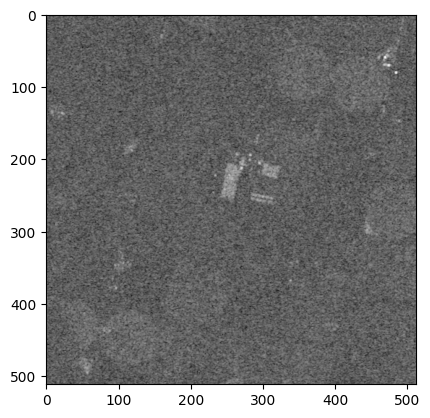

In [14]:
plt.imshow(20*np.log10(np.abs(tile)),cmap='gray')
#plt.imshow(tile,cmap='gray')

In [15]:
file1 = 's1a-iw-grd-vh-20240209t005438-20240209t005503-052475-0658ae-002.tiff'

In [16]:
img_tiff = tifffile.imread(sar_tiff_files + file1)

/tmp/ipykernel_3353/3093041702.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(np.abs(img_tiff[0:1000, 0:1000])),cmap='gray')


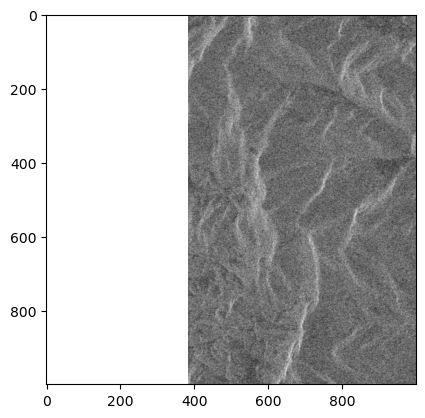

In [171]:
# The example of 'no data' edge that was present in most SAR tiff files:
plt.imshow(20*np.log10(np.abs(img_tiff[0:1000, 0:1000])),cmap='gray')

In [86]:

# tile = Image.open(sar_tiles_512 + "s1a-iw-grd-vh-20240214t130201-20240214t130226-052555-065b62-002_2560_16384.tiff") ## houses, roads
tile = Image.open(sar_tiles_512 + "s1a-iw-grd-vh-20240214t130201-20240214t130226-052555-065b62-002_2560_16896.tiff")  
# tile = Image.open(sar_tiles_512 + "s1a-iw-grd-vv-20240214t130201-20240214t130226-052555-065b62-001_9728_16384.tiff")  ## houses
# tile = Image.open(sar_tiles_512 + "s1a-iw-grd-vv-20240214t130201-20240214t130226-052555-065b62-001_9728_17408.tiff")  ## mountains
# tile = Image.open(sar_tiles_512 + "s1a-iw-grd-vv-20240214t130201-20240214t130226-052555-065b62-001_9728_16384.tiff")  ## houses, roads
# tile = Image.open(sar_tiles_512 + "s1a-iw-grd-vv-20240214t130201-20240214t130226-052555-065b62-001_9216_16896.tiff")
# tile = Image.open(sar_tiles_512 + "s1a-iw-grd-vh-20240210t230021-20240210t230046-052503-0659a8-002_8192_20480.tiff")


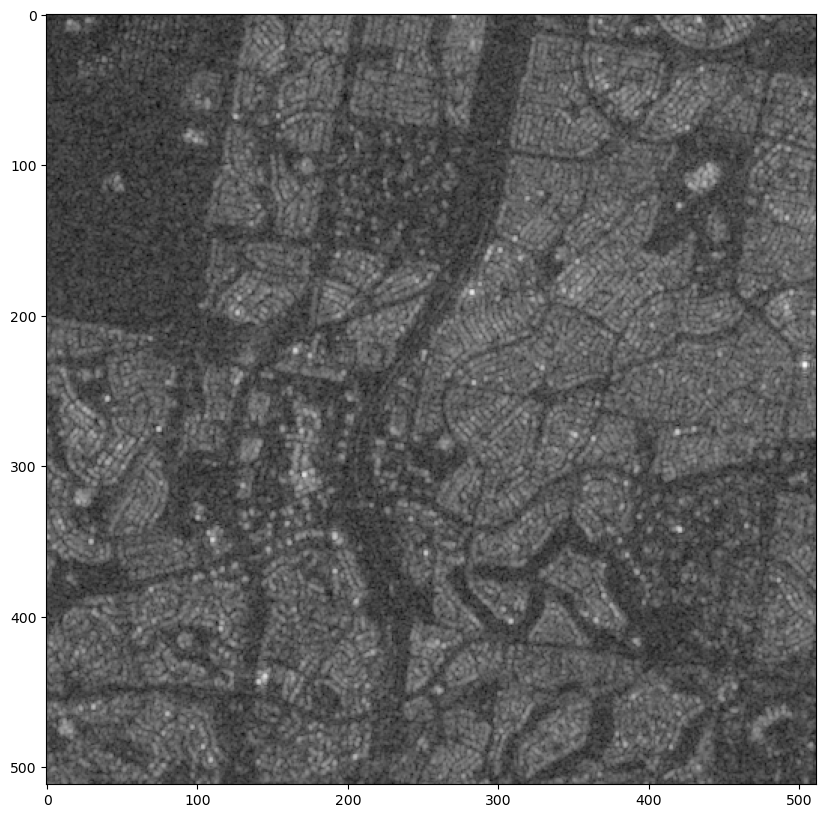

In [87]:
plt.figure(figsize=(10,10))
plt.imshow(20*np.log10(np.abs(tile)),cmap='gray')

In [91]:
# Initially no scaling was applied for tiles preparation, 
# therefore the pixel amplitude is not limited to 0-255:
np.max(tile), tile.size

(3476, (512, 512))

## Uploading the dataset to Huggingface Hub:

In [80]:
# https://huggingface.co/docs/datasets/upload_dataset

from datasets import load_dataset
from huggingface_hub import notebook_login

notebook_login()

In [81]:
dataset = load_dataset("data/SAR/sar_tiles_512")

Resolving data files:   0%|          | 0/8000 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [82]:
dataset.push_to_hub("ReginaFoley/sar_data_512")

Uploading the dataset shards:   0%|          | 0/9 [00:00<?, ?it/s]

Map:   0%|          | 0/889 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Map:   0%|          | 0/889 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Map:   0%|          | 0/889 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Map:   0%|          | 0/889 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Map:   0%|          | 0/889 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Map:   0%|          | 0/889 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Map:   0%|          | 0/889 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Map:   0%|          | 0/889 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Map:   0%|          | 0/888 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ReginaFoley/sar_data_512/commit/d54fcbdf1554e12e0b97148dad3337b936845ee9', commit_message='Upload dataset', commit_description='', oid='d54fcbdf1554e12e0b97148dad3337b936845ee9', pr_url=None, pr_revision=None, pr_num=None)

In [84]:
dataset64 = load_dataset("data/SAR/sar_tiles_64")

Resolving data files:   0%|          | 0/540649 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [85]:
# dataset.push_to_hub("ReginaFoley/sar_data_64")